<a href="https://colab.research.google.com/github/JuanSol26/Proyecto-3/blob/main/enc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")
import scipy.stats as stats
from datetime import datetime
from scipy.stats import chi2_contingency

In [68]:
url = "https://github.com/JuanSol26/Proyecto-3/raw/refs/heads/main/Excel%20(1).xlsx"
df = pd.read_excel(url)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4000 non-null   int64  
 1   Edad              4000 non-null   int64  
 2   Grup              4000 non-null   int64  
 3   Provincia         4000 non-null   int64  
 4   Estudios          0 non-null      float64
 5   Salud             4000 non-null   int64  
 6   Interes           4000 non-null   int64  
 7   Voto              4000 non-null   int64  
 8   Voto bal          4000 non-null   int64  
 9   Evaluaciòn        4000 non-null   int64  
 10  Evaluacion prov   4000 non-null   int64  
 11  Eval eco          4000 non-null   int64  
 12  Eval per          4000 non-null   int64  
 13  Aprobaciòn nac    4000 non-null   int64  
 14  Aprob Prov        4000 non-null   int64  
 15  Nac 1             4000 non-null   int64  
 16  Nac 2             4000 non-null   int64  


In [69]:
df.rename(columns={'Voto ': "Voto"}, inplace=True)
df.rename(columns={'Calificaciòn 1_nac': "Nac 1"}, inplace=True)
df.rename(columns={'Calificaciòn 2_nac': "Nac 2"}, inplace=True)
df.rename(columns={'Calificaciòn 3_nac': "Nac 3"}, inplace=True)
df.rename(columns={'Calificaciòn 4_nac': "Nac 4"}, inplace=True)
df.rename(columns={'Calificaciòn 5_nac': "Nac 5"}, inplace=True)
df.rename(columns={'Calificaciòn 1_prov': "Prov 1"}, inplace=True)
df.rename(columns={'Calificaciòn 2_prov': "Prov 2"}, inplace=True)
df.rename(columns={'Calificaciòn 3_prov': "Prov 3"}, inplace=True)
df.rename(columns={'Calificaciòn 4_prov': "Prov 4"}, inplace=True)
df.rename(columns={'Calificaciòn 5_prov': "Prov 5"}, inplace=True)
df.rename(columns={'Tipo ': "Tipo"}, inplace=True)


In [70]:
df_ind = df[["ID", "Edad", "Grup", "Provincia", "Estudios", "Salud", "Interes"]]
df_vot = df[["ID", "Voto", "Voto bal", "Evaluaciòn", "Evaluacion prov", "Eval eco", "Eval per"]]
df_pol = df[["ID", "Aprobaciòn nac", "Aprob Prov", "Nac 1", "Nac 2", "Nac 3", "Nac 4", "Nac 5", "Prov 1", "Prov 2", "Prov 3", "Prov 4", "Prov 5" ]]
df_pol2 = df[["ID", "Pol 1", "Pol 2", "Pol 3", "Pol 4", "Pol 5", "Pol 6", "Pol 7", "Pol 8"]]
df_vot2 = df[["ID", "Aprobaciòn nac.1", "Aprob Prov.1", "Predic nac", "Predic prov", "Gob o Op", "Gob o Op prov"]]
df_idl = df[["ID", "Id 1", "Id 2", "Id 3", "Id 4"]]
df_hog = df[["ID", "Tipo", "Hog", "Hog 2", "Hog 3", "Ing", "Gen"]]

In [71]:
df_ind["ID"] = df_ind["ID"].astype(np.int16)
df_ind["Edad"] = df_ind["Edad"].astype(np.int16)
df_ind["Grup"] = df_ind["Grup"].astype(np.int16)
df_ind["Provincia"] = df_ind["Provincia"].astype(np.int16)
df_ind["Salud"] = df_ind["Salud"].astype(np.int16)
df_ind["Interes"] = df_ind["Interes"].astype(np.int16)

In [76]:
df_vot["ID"] = df_vot["ID"].astype(np.int16)
df_vot["Voto"] = df_vot["Voto"].astype(np.int16)
df_vot["Voto bal"] = df_vot["Voto bal"].astype(np.int16)
df_vot["Evaluaciòn"] = df_vot["Evaluaciòn"].astype(np.int16)
df_vot["Evaluacion prov"] =df_vot["Evaluacion prov"].astype(np.int16)
df_vot["Eval eco"] = df_vot["Eval eco"].astype(np.int16)
df_vot["Eval per"] = df_vot["Eval per"].astype(np.int16)

In [80]:
df_pol["ID"] = df_pol["ID"].astype(np.int16)
df_pol["Aprobaciòn nac"] = df_pol["Aprobaciòn nac"].astype(np.int16)
df_pol["Aprob Prov"] = df_pol["Aprob Prov"].astype(np.int16)
df_pol["Nac 1"] = df_pol["Nac 1"].astype(np.int16)
df_pol["Nac 2"] = df_pol["Nac 2"].astype(np.int16)
df_pol["Nac 3"] = df_pol["Nac 3"].astype(np.int16)
df_pol["Nac 4"] = df_pol["Nac 4"].astype(np.int16)
df_pol["Nac 5"] = df_pol["Nac 5"].astype(np.int16)
df_pol["Prov 1"] = df_pol["Prov 1"].astype(np.int16)
df_pol["Prov 2"] = df_pol["Prov 2"].astype(np.int16)
df_pol["Prov 3"] = df_pol["Prov 3"].astype(np.int16)
df_pol["Prov 4"] = df_pol["Prov 4"].astype(np.int16)
df_pol["Prov 5"] = df_pol["Prov 5"].astype(np.int16)

In [83]:
df_pol2["ID"] = df_pol2["ID"].astype(np.int16)
df_pol2["Pol 1"] = df_pol2["Pol 1"].astype(np.int16)
df_pol2["Pol 2"] = df_pol2["Pol 2"].astype(np.int16)
df_pol2["Pol 3"] = df_pol2["Pol 3"].astype(np.int16)
df_pol2["Pol 4"] = df_pol2["Pol 4"].astype(np.int16)
df_pol2["Pol 5"] = df_pol2["Pol 5"].astype(np.int16)
df_pol2["Pol 6"] = df_pol2["Pol 6"].astype(np.int16)
df_pol2["Pol 7"] = df_pol2["Pol 7"].astype(np.int16)
df_pol2["Pol 8"] = df_pol2["Pol 8"].astype(np.int16)

In [86]:
df_vot2["ID"] = df_vot2["ID"].astype(np.int16)
df_vot2["Aprobaciòn nac.1"] = df_vot2["Aprobaciòn nac.1"].astype(np.int16)
df_vot2["Aprob Prov.1"] = df_vot2["Aprob Prov.1"].astype(np.int16)
df_vot2["Predic nac"] = df_vot2["Predic nac"].astype(np.int16)
df_vot2["Predic prov"] = df_vot2["Predic prov"].astype(np.int16)
df_vot2["Gob o Op"] = df_vot2["Gob o Op"].astype(np.int16)
df_vot2["Gob o Op prov"] = df_vot2["Gob o Op prov"].astype(np.int16)

In [90]:
df_idl["ID"] = df_idl["ID"].astype(np.int16)
df_idl["Id 1"] = df_idl["Id 1"].astype(np.int16)
df_idl["Id 2"] = df_idl["Id 2"].astype(np.int16)
df_idl["Id 3"] = df_idl["Id 3"].astype(np.int16)
df_idl["Id 4"]= df_idl["Id 4"].astype(np.int16)

In [94]:
df_hog["ID"]= df_hog["ID"].astype(np.int16)
df_hog["Tipo"] = df_hog["Tipo"].astype(np.int16)
df_hog["Hog"] = df_hog["Hog"].astype(np.int16)
df_hog["Hog 2"] = df_hog["Hog 2"].astype(np.int16)
df_hog["Hog 3"] = df_hog["Hog 3"].astype(np.int16)
df_hog["Gen"] = df_hog["Gen"].astype(np.int16)

Individuos

In [97]:
df_ind.describe().round(0)

,ID,Edad,Grup,Provincia,Estudios,Salud,Interes
count,4000.0,4000.0,4000.0,4000.0,0.0,4000.0,4000.0
mean,2000.0,47.0,2.0,6.0,NaN,3.0,3.0
std,1155.0,18.0,1.0,3.0,NaN,1.0,1.0
min,1.0,18.0,1.0,1.0,NaN,1.0,1.0
25%,1001.0,30.0,2.0,3.0,NaN,2.0,2.0
50%,2000.0,46.0,2.0,6.0,NaN,3.0,3.0
75%,3000.0,63.0,3.0,8.0,NaN,4.0,4.0
max,4000.0,80.0,3.0,9.0,NaN,4.0,5.0


In [103]:
Provincias = {1: "CABA", 2: "GBA", 3:"Cordoba", 4:"Santa Fe", 5:"Mendoza", 6: "Interior PBA", 7:"NOA", 8:"NEA", 9:"Sur"}

In [104]:
print (df_ind["Provincia"].value_counts(ascending=False), Provincias)

Provincia
8    679
7    665
2    600
9    590
6    516
3    250
4    250
1    250
5    200
Name: count, dtype: int64 {1: 'CABA', 2: 'GBA', 3: 'Cordoba', 4: 'Santa Fe', 5: 'Mendoza', 6: 'Interior PBA', 7: 'NOA', 8: 'NEA', 9: 'Sur'}


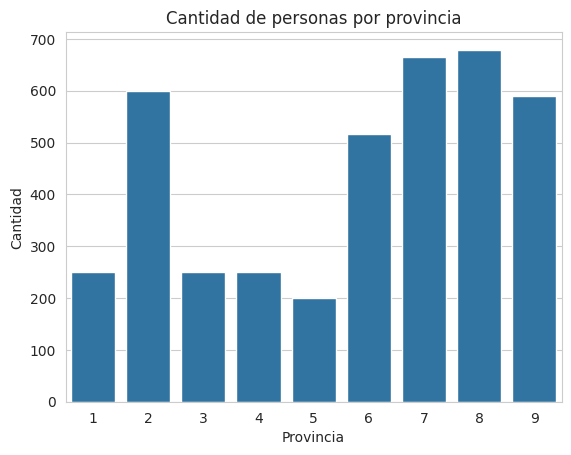

In [110]:
sns.countplot(x="Provincia", data=df_ind)
sns.set_style("whitegrid")
plt.title("Cantidad de personas por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad")
plt.show()

([<matplotlib.patches.Wedge at 0x78d450614790>,
 [Text(0.9526279355804298, 0.5500000148652441, ''),
  Text(-0.5500000594609755, 0.9526279098330699, ''),
  Text(1.0298943251329445e-07, -1.0999999999999954, '')])

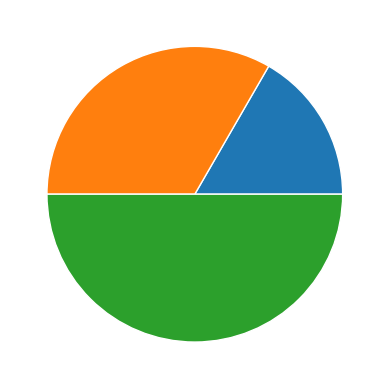

In [114]:
plt.pie(df_ind["Grup"].unique())